In [ ]:
pip install roboflow ultralytics

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import necessary libraries
from roboflow import Roboflow
from ultralytics import YOLO

In [ ]:
rf = Roboflow(api_key="M3G04YusuBRn3oLoZAF8")
project = rf.workspace("chessboard-ulleh").project("chessboard_model")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chessboard_model-1 in yolov11:: 100%|██████████| 26/26 [00:00<00:00, 1662.53it/s]


In [3]:
# Step 2: Verify dataset structure
dataset_path = dataset.location  # Get the dataset location
data_yaml_path = dataset_path + "/data.yaml"  # Path to the data.yaml file

# Print dataset info
print(f"Dataset downloaded to: {dataset_path}")
print(f"Data configuration file: {data_yaml_path}")

Dataset downloaded to: c:\Users\samad\Coding\Tuwaiq\Chess Project\chessboard_model-1
Data configuration file: c:\Users\samad\Coding\Tuwaiq\Chess Project\chessboard_model-1/data.yaml


In [5]:
# Step 3: Train the YOLOv8 model
# Load the YOLOv8 model
model = YOLO("yolo11n.pt")

# Train the model
# model.train(
#     data=data_yaml_path,          # Path to the data.yaml file
#     epochs=100,                    # Number of training epochs
#     imgsz=640,                    # Image size (640x640)
#     batch=16,                     # Batch size (adjust based on your GPU memory)
#     name="yolov11_detect_cells",  # Name of the training run
#     project="runs/train",         # Directory for training runs
# )

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.2MB/s]


Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/chessboard_model-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=yolov11_detect_cells, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 20.7MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/chessboard_model-1/train/labels... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 425.38it/s]

train: New cache created: /content/chessboard_model-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/chessboard_model-1/valid/labels... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<00:00, 746.98it/s]

val: New cache created: /content/chessboard_model-1/valid/labels.cache


Plotting labels to runs/train/yolov11_detect_cells/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/yolov11_detect_cells
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.02G      1.726      3.909      1.469        505        640: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all          1         64    0.00891     0.0417     0.0122    0.00932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      0.86G      1.446      3.828      1.515        359        640: 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all          1         64    0.00989     0.0417     0.0279     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.935G      1.683      3.907      1.481        415        640: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all          1         64     0.0103     0.0417     0.0273     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.992G      1.489      3.915      1.404        423        640: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.75it/s]

                   all          1         64     0.0144     0.0625     0.0149     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.975G      1.319       3.89      1.352        431        640: 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.22it/s]

                   all          1         64     0.0222     0.0938     0.0212     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.916G      1.065      3.854      1.256        385        640: 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.35it/s]

                   all          1         64     0.0236      0.104     0.0227     0.0159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.986G      1.096      3.955      1.172        590        640: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.13it/s]

                   all          1         64     0.0325      0.177     0.0583     0.0246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.933G     0.9393      3.794      1.181        424        640: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.69it/s]

                   all          1         64      0.036      0.208     0.0648     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       0.9G     0.9334      3.558      1.185        342        640: 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.53it/s]

                   all          1         64     0.0447       0.26     0.0893     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.935G     0.7552      3.555      1.053        351        640: 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.40it/s]

                   all          1         64     0.0581      0.302      0.123     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.925G     0.8457      3.627      1.123        454        640: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all          1         64     0.0649      0.344      0.128     0.0721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.883G     0.7248      3.403       1.03        292        640: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.66it/s]

                   all          1         64     0.0747      0.385      0.174      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.833G     0.7912      3.319      1.034        234        640: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.48it/s]

                   all          1         64     0.0687      0.354      0.145      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.03G     0.7307      3.612      1.044        531        640: 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.41it/s]

                   all          1         64      0.097      0.406      0.165      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.958G     0.6999      3.607      1.021        572        640: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.24it/s]

                   all          1         64        0.1      0.354      0.164      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         1G      0.769      3.401     0.9543        415        640: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.76it/s]

                   all          1         64      0.127      0.396      0.163       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.03G     0.5861      3.285       0.94        402        640: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.92it/s]

                   all          1         64      0.127      0.406      0.168       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.02G     0.7069      3.307     0.9392        422        640: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.74it/s]


                   all          1         64      0.127      0.406      0.168       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.05G     0.6247      3.339     0.9346        481        640: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.82it/s]

                   all          1         64      0.111      0.385      0.148     0.0975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.942G     0.5932      3.181     0.9257        397        640: 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.11it/s]

                   all          1         64      0.111      0.385      0.148     0.0975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.01G     0.5827      3.236     0.9322        427        640: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.59it/s]

                   all          1         64      0.085      0.333      0.135     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.977G      0.607      3.131     0.9352        413        640: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.38it/s]

                   all          1         64      0.085      0.333      0.135     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.09G      0.643      3.421     0.9591        675        640: 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.86it/s]

                   all          1         64     0.0901      0.375      0.168       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.04G      0.643       3.14     0.9142        477        640: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.11it/s]

                   all          1         64     0.0901      0.375      0.168       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         1G     0.6052      3.223     0.9226        538        640: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.70it/s]

                   all          1         64      0.126      0.583       0.28      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.866G     0.6494      2.937     0.9345        301        640: 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.55it/s]

                   all          1         64      0.126      0.583       0.28      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.07G     0.6836      2.939     0.8888        387        640: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.89it/s]

                   all          1         64      0.138      0.625      0.298      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.965G     0.6023      3.021     0.9403        490        640: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.99it/s]

                   all          1         64      0.138      0.625      0.298      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.935G     0.6158       2.93     0.9091        385        640: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.11it/s]

                   all          1         64       0.14      0.625      0.308      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      0.95G     0.6118      2.857     0.8907        429        640: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.87it/s]

                   all          1         64       0.14      0.625      0.308      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.933G     0.5851      2.782        0.9        336        640: 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.27it/s]

                   all          1         64      0.154      0.688      0.349      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.984G     0.5803      2.874     0.8941        509        640: 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.84it/s]

                   all          1         64      0.154      0.688      0.349      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.935G     0.5729      2.737     0.9036        345        640: 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.53it/s]

                   all          1         64      0.172       0.75      0.443      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.04G     0.6054      2.887     0.9189        564        640: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.30it/s]

                   all          1         64      0.172       0.75      0.443      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.935G     0.6142      2.735     0.8997        379        640: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.26it/s]

                   all          1         64      0.193      0.875      0.571       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.02G     0.5724       2.66     0.8849        443        640: 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.10it/s]

                   all          1         64      0.193      0.875      0.571       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.933G      0.562      2.658     0.8976        415        640: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.10it/s]

                   all          1         64      0.202      0.958      0.656      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.04G     0.6962      2.768     0.8867        576        640: 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.98it/s]

                   all          1         64      0.202      0.958      0.656      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.01G     0.5664      2.602     0.8796        495        640: 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.61it/s]

                   all          1         64      0.209          1      0.708      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.01G     0.5456      2.499     0.8661        452        640: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.94it/s]

                   all          1         64      0.209          1      0.708      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.07G     0.6269      2.712     0.8717        610        640: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.26it/s]

                   all          1         64      0.208          1      0.744      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.03G     0.5794       2.57     0.8732        521        640: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.56it/s]

                   all          1         64      0.208          1      0.744      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.977G     0.5355      2.517     0.8699        486        640: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]

                   all          1         64      0.208          1      0.788      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.992G     0.4936       2.25     0.8574        377        640: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.98it/s]

                   all          1         64      0.208          1      0.788      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      0.91G     0.6071      2.401     0.8947        410        640: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.88it/s]

                   all          1         64      0.208          1      0.865      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.986G     0.5488      2.198     0.8793        367        640: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.55it/s]

                   all          1         64      0.208          1      0.865      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.984G     0.5451      2.276     0.8914        461        640: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.35it/s]

                   all          1         64      0.209          1      0.912      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.02G     0.6215      2.381     0.8915        594        640: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.44it/s]

                   all          1         64      0.209          1      0.912      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         1G     0.5535      2.272     0.8768        488        640: 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.94it/s]

                   all          1         64      0.209          1      0.947      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.893G     0.5865      2.069     0.9059        380        640: 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.42it/s]

                   all          1         64      0.209          1      0.947      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.02G     0.5475      2.236     0.8891        613        640: 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.39it/s]

                   all          1         64      0.213          1      0.958      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.919G     0.6223      2.015     0.9304        334        640: 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.97it/s]

                   all          1         64      0.213          1      0.958      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       0.9G     0.5494      1.774     0.8894        274        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.38it/s]

                   all          1         64      0.213          1      0.958      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.04G     0.6091      2.358     0.8733        664        640: 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.87it/s]

                   all          1         64      0.213          1      0.969      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         1G     0.6116      2.018     0.8668        515        640: 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.07it/s]

                   all          1         64      0.213          1      0.969      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.967G     0.5651       1.84     0.8723        410        640: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.52it/s]


                   all          1         64      0.213          1      0.969      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.02G     0.5543      1.828     0.8829        392        640: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.53it/s]

                   all          1         64      0.214          1      0.974      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.03G     0.5677      1.808     0.8824        533        640: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.70it/s]

                   all          1         64      0.214          1      0.974      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.03G     0.5746      1.727     0.8441        439        640: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.90it/s]

                   all          1         64      0.214          1      0.974      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      0.96G     0.5804      1.853     0.8838        466        640: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.24it/s]

                   all          1         64      0.212          1      0.979      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         1G     0.5312        1.5     0.8811        357        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.46it/s]

                   all          1         64      0.212          1      0.979      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.965G     0.5389      1.607     0.8586        431        640: 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.62it/s]

                   all          1         64      0.212          1      0.979      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.03G     0.5351      1.694     0.8606        453        640: 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.21it/s]

                   all          1         64      0.211          1      0.982      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.06G     0.5313      1.636     0.8616        464        640: 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.01it/s]

                   all          1         64      0.211          1      0.982      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.03G      0.572      1.813     0.8548        577        640: 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.33it/s]

                   all          1         64      0.211          1      0.982      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.935G     0.5909       1.51      0.906        373        640: 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.59it/s]

                   all          1         64      0.212          1      0.986      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.02G     0.5482      1.518     0.8806        461        640: 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.26it/s]

                   all          1         64      0.212          1      0.986      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.02G     0.5499       1.78     0.8523        599        640: 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.88it/s]

                   all          1         64      0.212          1      0.986      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.12G     0.5496      1.892     0.8893        662        640: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.73it/s]

                   all          1         64      0.212          1      0.988      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.973G     0.5119       1.63     0.8739        542        640: 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.64it/s]

                   all          1         64      0.212          1      0.988      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.07G     0.5561      1.603     0.8682        530        640: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.70it/s]

                   all          1         64      0.212          1      0.988      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.984G     0.5462      1.708     0.8537        586        640: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.83it/s]

                   all          1         64      0.211          1      0.987      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.935G     0.5696       1.38     0.9029        389        640: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.53it/s]

                   all          1         64      0.211          1      0.987      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.06G     0.5574      1.755     0.8694        669        640: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.10it/s]

                   all          1         64      0.211          1      0.987      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      0.96G     0.5591      1.265     0.8581        395        640: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.83it/s]

                   all          1         64      0.382          1       0.98      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.875G     0.6273      1.305     0.9066        269        640: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.18it/s]

                   all          1         64      0.382          1       0.98      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.883G      0.575      1.233     0.9052        280        640: 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.99it/s]

                   all          1         64      0.382          1       0.98      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         1G      0.496      1.395     0.8362        571        640: 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.92it/s]

                   all          1         64      0.818      0.918      0.966      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.958G      0.525      1.125     0.8769        371        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.33it/s]

                   all          1         64      0.818      0.918      0.966      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      0.96G     0.5347      1.344     0.8808        494        640: 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.66it/s]

                   all          1         64      0.818      0.918      0.966      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.02G     0.5261      1.343     0.8242        550        640: 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.60it/s]

                   all          1         64      0.943      0.811      0.959      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.958G     0.5219      1.026     0.8472        381        640: 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.77it/s]

                   all          1         64      0.943      0.811      0.959      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.01G     0.5119      1.091     0.8617        384        640: 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.83it/s]


                   all          1         64      0.943      0.811      0.959      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.04G     0.5479      1.243     0.8476        502        640: 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.29it/s]

                   all          1         64       0.94      0.771      0.949      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.992G     0.5361        1.1     0.8514        391        640: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.45it/s]

                   all          1         64       0.94      0.771      0.949      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.02G     0.5171      1.197     0.8444        509        640: 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.80it/s]

                   all          1         64       0.94      0.771      0.949      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.05G     0.4999      1.069     0.8449        484        640: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.14it/s]

                   all          1         64       0.94      0.771      0.949      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.02G     0.5492      1.314     0.8454        581        640: 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.73it/s]

                   all          1         64      0.954      0.683      0.949      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       0.9G     0.5408      1.125     0.8826        355        640: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.07it/s]

                   all          1         64      0.954      0.683      0.949      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.02G     0.5332      1.052     0.8548        485        640: 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.91it/s]

                   all          1         64      0.954      0.683      0.949      0.834


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.858G     0.5178     0.9442     0.8266        322        640: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]


                   all          1         64      0.954      0.683      0.949      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.858G     0.4937     0.9802      0.835        322        640: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all          1         64      0.955      0.827      0.961      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.849G     0.5151      1.069     0.8753        314        640: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all          1         64      0.955      0.827      0.961      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.858G     0.5057     0.8408     0.8624        322        640: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.79it/s]

                   all          1         64      0.955      0.827      0.961      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.858G      0.517      1.082     0.8542        298        640: 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.69it/s]

                   all          1         64      0.955      0.827      0.961      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.858G     0.4843      1.062     0.8563        322        640: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.34it/s]

                   all          1         64      0.958      0.823      0.978      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.849G      0.533       1.19     0.9026        310        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.35it/s]

                   all          1         64      0.958      0.823      0.978      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.858G     0.5051     0.8834      0.832        322        640: 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.02it/s]

                   all          1         64      0.958      0.823      0.978      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.858G     0.5058      1.222     0.8912        307        640: 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.61it/s]


                   all          1         64      0.958      0.823      0.978      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.858G      0.509     0.9767     0.8638        309        640: 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.52it/s]

                   all          1         64      0.957      0.822      0.988      0.894



100 epochs completed in 0.030 hours.
Optimizer stripped from runs/train/yolov11_detect_cells/weights/last.pt, 5.5MB
Optimizer stripped from runs/train/yolov11_detect_cells/weights/best.pt, 5.5MB

Validating runs/train/yolov11_detect_cells/weights/best.pt...
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.37it/s]


                   all          1         64      0.958      0.822      0.988      0.895
                 black          1         16      0.874          1      0.973      0.907
                 empty          1         32          1      0.933      0.995      0.934
                 white          1         16          1      0.533      0.995      0.845
Speed: 0.4ms preprocess, 18.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/train/yolov11_detect_cells


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b7af0ee3070>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [41]:
model = YOLO("bestV1.pt")

In [42]:
# Evaluate the model on the test set
metrics = model.val(data=data_yaml_path, split="test")

Ultralytics 8.3.51  Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i7-8550U 1.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\samad\Coding\Tuwaiq\Chess Project\chessboard_model-1\test\labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


                   all          1         64      0.962      0.835      0.991      0.856
                 black          1         16      0.885          1      0.982      0.916
                 empty          1         32          1      0.833      0.995      0.896
                 white          1         16          1      0.673      0.995      0.755
Speed: 4.0ms preprocess, 336.8ms inference, 0.0ms loss, 39.9ms postprocess per image
Results saved to runs\detect\val2


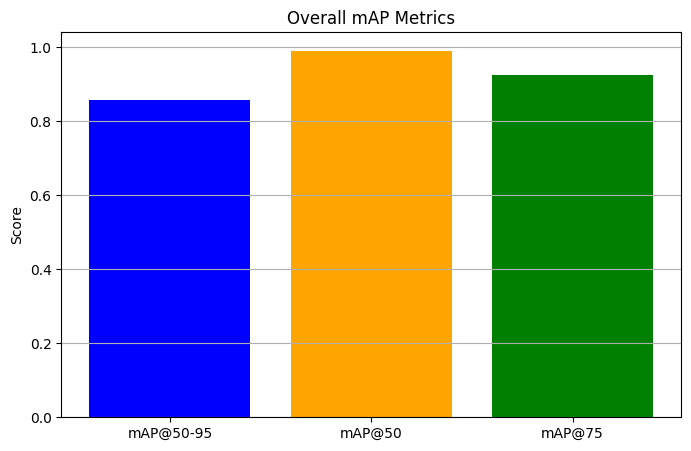

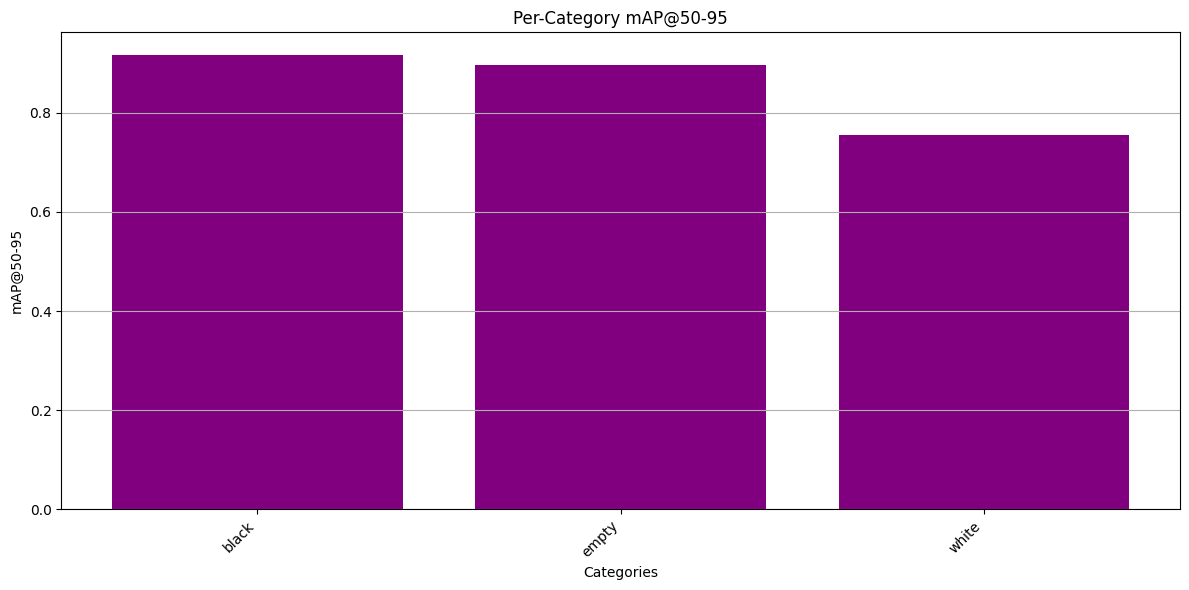

In [43]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Extract overall metrics
map50_95 = metrics.box.map  # Overall mAP 50-95
map50 = metrics.box.map50   # mAP at IoU 50
map75 = metrics.box.map75   # mAP at IoU 75
category_maps = metrics.box.maps  # List of mAP 50-95 for each category
class_names = metrics.names  # Dictionary mapping indices to class names

# Map class indices to names
class_labels = [class_names[i] for i in range(len(category_maps))]

# Overall mAP visualization
plt.figure(figsize=(8, 5))
plt.bar(['mAP@50-95', 'mAP@50', 'mAP@75'], [map50_95, map50, map75], color=['blue', 'orange', 'green'])
plt.title('Overall mAP Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

# Per-category mAP visualization
if category_maps.any():
    x_indices = np.arange(len(category_maps))

    plt.figure(figsize=(12, 6))
    plt.bar(x_indices, category_maps, color='purple')
    plt.title('Per-Category mAP@50-95')
    plt.xlabel('Categories')
    plt.ylabel('mAP@50-95')
    plt.xticks(x_indices, class_labels, rotation=45, ha="right")  # Label bars with class names
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()



In [44]:
results = model.predict('training images/IMG_0497.JPEG', conf=0.05)
results[0].show()


image 1/1 c:\Users\samad\Coding\Tuwaiq\Chess Project\training images\IMG_0497.JPEG: 640x640 16 blacks, 32 emptys, 17 whites, 294.1ms
Speed: 18.6ms preprocess, 294.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


In [45]:
import cv2
import numpy as np

def process_chessboard(image, detections):
    """
    Process the detected cells on the chessboard image.

    :param image: The original chessboard image.
    :param detections: List of bounding boxes with detection classes.
    :return: Annotated image with grid indices.
    """
    # Sort cells by their `y` coordinate (row-wise), then by `x` coordinate (column-wise)
    detections = sorted(detections, key=lambda box: (box[1], box[0]))  # Sort by (y1, x1)

    rows = []
    current_row = [detections[0]]
    row_threshold = 20  # Adjust based on resolution

    for i in range(1, len(detections)):
        if abs(detections[i][1] - current_row[0][1]) < row_threshold:
            current_row.append(detections[i])
        else:
            rows.append(current_row)
            current_row = [detections[i]]
    rows.append(current_row)

    # Sort each row by x-coordinate
    rows = [sorted(row, key=lambda box: box[0]) for row in rows]

    # Assign grid indices (a1 to h8)
    columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    rows_labels = ['1', '2', '3', '4', '5', '6', '7', '8']

    for row_idx, row in enumerate(rows):
        for col_idx, cell in enumerate(row):
            x1, y1, x2, y2 = map(int, cell)
            grid_label = f"{columns[col_idx]}{rows_labels[7 - row_idx]}"  # Chess notation (flip rows)
            
            # Draw the bounding box and grid label
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
            cv2.putText(image, grid_label, (x1 + 5, y1 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    return image

# Example Usage
results = model.predict('training images/IMG_0497.JPEG')
detections = results[0].boxes.xyxy.cpu().numpy()  # Bounding boxes as numpy array
orig_image = results[0].orig_img

# Process the image
annotated_image = process_chessboard(orig_image, detections)

# Save or display the result
cv2.imwrite("annotated_chessboard.jpg", annotated_image)
print("Annotated chessboard saved as 'annotated_chessboard.jpg'")



image 1/1 c:\Users\samad\Coding\Tuwaiq\Chess Project\training images\IMG_0497.JPEG: 640x640 6 blacks, 6 emptys, 281.1ms
Speed: 7.3ms preprocess, 281.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Annotated chessboard saved as 'annotated_chessboard.jpg'


In [46]:
results = model.predict('training images/IMG_0497.JPEG', conf=0.05)
detections = results[0].boxes.xyxy.cpu().numpy()  # Bounding boxes as numpy array
orig_image = results[0].orig_img

# Process the image
annotated_image = process_chessboard(orig_image, detections)
detections = sorted(detections, key=lambda box: (box[1], box[0]))


image 1/1 c:\Users\samad\Coding\Tuwaiq\Chess Project\training images\IMG_0497.JPEG: 640x640 16 blacks, 32 emptys, 17 whites, 424.1ms
Speed: 1.6ms preprocess, 424.1ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 640)


In [47]:
import torch

# Function to get the minimum x-coordinate
def get_min_x(xyxy):
    return xyxy[:, 0].min().item()  # Use .min() to find the minimum and .item() to get scalar

# Function to get the maximum x-coordinate (x + width)
def get_max_x(xyxy):
    return xyxy[:, 2].max().item()  # Use .max() for the maximum value

# Function to get the minimum y-coordinate
def get_min_y(xyxy):
    return xyxy[:, 1].min().item()

# Function to get the maximum y-coordinate (y + height)
def get_max_y(xyxy):
    return xyxy[:, 3].max().item()


In [48]:
xyxy = results[0].boxes.xyxy
min_x = get_min_x(xyxy)
max_x = get_max_x(xyxy) # x + width for all boxes
min_y = get_min_y(xyxy)
max_y = get_max_y(xyxy) # y + height for all boxes
print(f"Crop coordinates: ({min_x}, {min_y}), ({max_x}, {max_y})")


Crop coordinates: (242.5899658203125, 209.74713134765625), (1610.68115234375, 1637.7781982421875)


In [49]:
# Assuming results[0] contains predictions for a single image
predicted_classes = results[0].boxes.cls  # `cls` contains the class indices

# To map class indices to class names
class_names = model.names  # Assuming the model has a `names` attribute for class labels
predicted_class_names = [class_names[int(cls_idx)] for cls_idx in predicted_classes]

print("Predicted Class Indices:", predicted_classes.tolist())  # List of class indices
print("Predicted Class Names:", predicted_class_names)         # List of class names

Predicted Class Indices: [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 2.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Predicted Class Names: ['black', 'black', 'black', 'black', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'black', 'black', 'empty', 'empty', 'empty', 'empty', 'empty', 'black', 'empty', 'white', 'white', 'empty', 'black', 'white', 'black', 'black', 'empty', 'white', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'white', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'white', 'empty', 'empty', 'black', 'black', 'black', 'black', 'white', 'white', 'empty', 'white', 'empty', 'empty', 'empty', 'white', 'white', 'black', 'black', 'white', 'white', 'white', 'white', 'white', 'white']


In [50]:
from PIL import Image

In [51]:
# Open the image using Pillow
image_path = 'training images/IMG_0497.JPEG'
img = Image.open(image_path)

# Crop the image
cropped_img = img.crop((min_x, min_y, max_x, max_y))  # (left, upper, right, lower)

# Save the cropped image
cropped_img.save('cropped_image.JPEG')
print("Cropped image saved as 'cropped_image.JPEG'.")

Cropped image saved as 'cropped_image.JPEG'.


In [52]:
def map_detections_to_spaces(boxes, spaces, classes, frame_shape, grid_rows, grid_cols):
    occupancy = {space: "initial" for space in spaces}
    index = 0
    for box in boxes:
        x_center = (box[0] + box[2]) / 2
        y_center = (box[1] + box[3]) / 2
        row = int(y_center * grid_rows / frame_shape[0])
        col = int(x_center * grid_cols / frame_shape[1])
        if 0 <= row < grid_rows and 0 <= col < grid_cols:
            space = f"{chr(65 + row)}{col + 1}"
            occupancy[space] = classes[index]
        index += 1

    return occupancy


In [53]:
grid_rows = 8
grid_cols = 8

# Create a grid for spaces
def create_grid(grid_rows, grid_cols):
    spaces = []
    for i in range(grid_rows):
        for j in range(grid_cols):
            spaces.append(f"{chr(65 + i)}{j + 1}")
    return spaces
spaces = create_grid(8, 8)

In [54]:
boxes = results[0].boxes.xyxy.cpu().numpy() if results else []

predicted_classes = results[0].boxes.cls  # `cls` contains the class indices
class_names = model.names  # Assuming the model has a `names` attribute for class labels
predicted_class_names = [class_names[int(cls_idx)] for cls_idx in predicted_classes]

In [55]:
map_detections_to_spaces(boxes, spaces, predicted_class_names, cropped_img.size, 8,8)

{'A1': 'initial',
 'A2': 'initial',
 'A3': 'initial',
 'A4': 'initial',
 'A5': 'initial',
 'A6': 'initial',
 'A7': 'initial',
 'A8': 'initial',
 'B1': 'initial',
 'B2': 'black',
 'B3': 'black',
 'B4': 'black',
 'B5': 'black',
 'B6': 'black',
 'B7': 'black',
 'B8': 'black',
 'C1': 'initial',
 'C2': 'black',
 'C3': 'black',
 'C4': 'black',
 'C5': 'black',
 'C6': 'black',
 'C7': 'black',
 'C8': 'black',
 'D1': 'initial',
 'D2': 'empty',
 'D3': 'empty',
 'D4': 'empty',
 'D5': 'empty',
 'D6': 'empty',
 'D7': 'empty',
 'D8': 'empty',
 'E1': 'initial',
 'E2': 'empty',
 'E3': 'empty',
 'E4': 'empty',
 'E5': 'empty',
 'E6': 'empty',
 'E7': 'empty',
 'E8': 'empty',
 'F1': 'initial',
 'F2': 'empty',
 'F3': 'empty',
 'F4': 'empty',
 'F5': 'empty',
 'F6': 'empty',
 'F7': 'empty',
 'F8': 'empty',
 'G1': 'initial',
 'G2': 'initial',
 'G3': 'initial',
 'G4': 'empty',
 'G5': 'empty',
 'G6': 'empty',
 'G7': 'empty',
 'G8': 'empty',
 'H1': 'initial',
 'H2': 'empty',
 'H3': 'empty',
 'H4': 'initial',
 'H5